<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_week4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리
데이터 전처리는 ML 알고리즘만큼 중요하다. ML 알고리즘은 데이터에 기반하기 때문에 어떤 데이터를 입력으로 가지냐에 따라 결과도 크게 달라진다(Garbage In, Garbage Out). 사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본 사항이 있다.

결손값, 즉 NaN, Null 값은 허용되지 않는다. 따라서 이러한 Null값은 고정된 다른 값으로 변환해야 한다. Null 값을 어떻게 처리해야 할지는 경우에 따라 다르다. 피처 값 중 Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 대체할 수 있지만, Null 값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 좋다. 가장 결정이 힘든 부분은 Null 값이 일정 수준 이상 되는 경우로, 해당 피처가 중요도가 높은 피처이고 Null을 단순히 피처의 평균값으로 대체할 경우 예측 왜곡이 심할 수 있다면 업무 로직 등을 상세히 검토해 더 정밀한 대체 값을 선정해야 한다.

사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않는다. 그래서 모든 문자열 값은 인코딩 되어 숫자형을 변환해야 한다. 문자열 피처는 일반적으로 카테고리형 피처와 텍스트형 피처를 의미한다.

### 데이터 인코딩
머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Lable encoding)과 원-핫 인코딩(One Hot Encoding)이 있다. 레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것이다.

#### 레이블 인코딩
사이킷런의 레이블 인코딩(Label encoding)은 LabelEncoder 클래스로 구현한다. LagelEncoder를 객체로 생성한 후 fit( )과 transform( )을 호출해 레이블 인코딩을 수행한다.

In [1]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


위 예제의 경우 데이터가 작아 문자열 값이 어떤 숫자 값으로 인코딩 되었는지 직관적으로 알 수 있지만, 많은 경우에는 이를 알 수 없다. 이 경우에는 LabelEncoder 객체의 classes_ 속성값으로 확인하면 된다.

In [2]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


classes_ 속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있다. inverse_transform( )을 통해 인코딩 값을 다시 디코딩할 수 있다.

In [3]:
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다. 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있다. 이는 숫자 값의 경우 크고 작음에 대한 특성이 작용해 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생한다. 따라서, 레이블 인코딩은 선형회귀와 같은 ML 알고리즘에는 적용하지 않고, 트리 계열의 ML 알고리즘에서는 문제 없이 사용할 수 있다.

원-핫 인코딩(One Hot Encoding)은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식이다.

#### 원-핫 인코딩(One-Hot Encoding)
원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼러멩만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다. 즉, 행 형태로 되어 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.


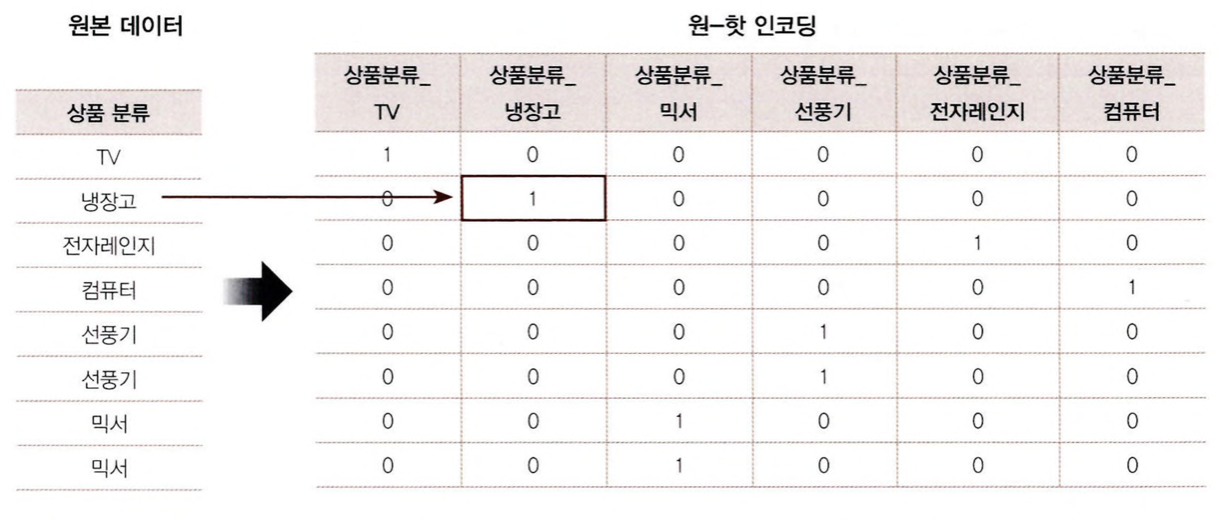

원본 데이터는 8개의 레코드로 되어 있으며, 고유 값은 모두 6개이다. 원-핫 인코딩에서는 0부터 5까지 6개의 상품 분류 고유 값에 따라 상품 분류 피처를 6개의 상품 분류 고유 값 피처로 변환한다. 해당 고유 값에 매칭되는 피처만 1이 되고 나머지 피처는 0을 입력하는 것이다. 이러한 특성으로 원-핫(여러 개의 속성 중 단 한 개의 속성만 1로 표시) 인코딩으로 명명하게 되었다.

원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 변환이 가능하다. 단, LabelEncoder와 다르게 약간 주의해야 할 점이 있다. 이는 입력값으로 2차원 데이터가 필요하다는 것과 OneHotEncoder를 이용해 변환한 값이 희소 행렬 형태이므로 이를 다시 toarray( ) 메서드를 이용해 밀집 행렬로 변환해야 한다는 것이다.

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray( )를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


8개의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환되었다.

판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있다. get_dummies( )를 이용하면 된다. 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환할 수 있다.

In [5]:
import pandas as pd

df = pd.DataFrame({'items': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


get_dummies( )를 이용해 숫자형 값으로 변환 없이도 바로 변환이 가능함을 알 수 있다.

### 피처 스케일링과 정규화
서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 한다. 대표적인 방법으로는 표준화(Standardization)과 정규화(Normalization)가 있다.

표준화는 데이터의 피처 각각이 평균이 0, 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것을 의미한다. 표준화를 통해 변환될 피처 $x$의 새로운 i번째 데이터를 $x_inew$라고 한다면 이 값은 원래 값에서 피처 $x$의 평균을 뺀 값을 피처 $x$의 표준편차로 나눈 값으로 계산할 수 있다.

$x_inew$ = $\frac{(x_i-mean(x))}{stdev(x)}$

일반적으로 정규화는 서로 달느 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다. 예를 들어 피처 A는 거리를 나타내는 변수, 피처 B는 금액을 나타내는 속성이라고 가정했을 때 이 변수를 모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1의 값으로 변환하는 것이다. 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것이다.

새로운 데이터 $x_inew$는 원래 값에서 피처 $x$의 최솟값을 뺀 값을 피처 $x$의 최댓값과 최솟값의 차이로 나눈 값으로 변환할 수 있다.

$x_inew$ = $\frac{x_i-min(x)}{max(x)-min(x)}$

그런데 사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화에는 약간의 차이가 있다. 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용되었으며 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미한다. 즉, 개별 벡터를 모든 피처 벡터의 크기로 나누어준다. 세 개의 피처 $x, y, z$가 있다고 하면 새로운 데이터 $x_inew$는 원래 값에서 세 개의 피처의 $i$번째 피처 값에 해당하는 크기를 합한 값으로 나누어준다.

$x_inew = \frac{x_i}{\sqrt{x_i^2+y_i^2+z_i^2}}$

혼선을 방지하기 위해 일반적인 의미의 표준화와 정규화를 피처 스케일링으로 통칭하고 선형대수 개념의 정규화를 벡터 정규화로 지칭한다. 먼저 사이킷런에서 제공하는 대표적인 피처 스케일링 클래스인 StandardScaler과 MinMaxScaler를 알아보자.

#### StandardScaler
StandardScaler는 표준화를 쉽게 지원하기 위한 클래스이다. 즉, 개별 피처를 평균이 0이고 분산이 1인 값으로 변환해준다. 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것은 몇몇 알고리즘에서 매우 중요한데 특히, 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신(Support Vector Machine)이나 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되었기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다.

StandardScaler가 어떻게 데이터 값을 변환하는지 데이터 세트로 확인해보자.

In [6]:
from sklearn.datasets import load_iris
import pandas as pd

# iris 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


StandardScaler를 이용해 각 피처를 한 번에 표준화해 변환해보자. StandardScaler 객체를 생성한 후에 fit( )과 transform( ) 메서드에 변환 대상 피처 데이터 세트를 입력 후, 호출하면 간단하게 변환이 가능하다. transform( )을 호출할 때 스케일 변환된 데이터 세트가 넘파이 ndarray이므로 이를 DataFrame으로 변환해 평균값과 분산 값을 다시 확인해보자.

In [7]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform( ) 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환됐음을 알 수 있다.

#### MinMaxScaler
MinMaxScaler는 데이터값을 0과 1 사이의 범위 값으로 변환한다. 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있다.

In [9]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform( ) 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있다.

#### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit( ), transform( ), fit_transform( ) 메서드를 이용한다. 일반적으로 fit( )은 데이터 변환을 위한 기준 정보 설정을 적용하며 transform( )은 이렇게 설정된 정보를 이용해 데이터를 변환한다. 그리고 fit_transform( )은 fit( )과 transform( )를 한 번에 적용하는 기능을 수행한다.

그런데 학습 데이터 세트와 테스트 데이터 세트에 이 fit( )과 transform( )을 적용할 때 주의가 필요하다. Scaler 객체를 이용해 학습 데이터 세트로 fit( )과 transform( )을 적용하면 테스트 데이터 세트는 다시 fit( )을 수행하지 않고 학습 데이터 세트로 fit( )을 수행한 결과를 이용해 transform( ) 변환을 적용해야 한다는 것이다. 즉 학습 데이터로 fit( )이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

학습 데이터인 train_array부터 MinMaxScaler를 이용해 변환한다. 학습데이터는 0부터 10까지의 값을 가지므로 1/10 Scale이 적용된다.

In [12]:
# MinMaxScaler 객체에 별도로 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit() 하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


이번에는 테스트 데이터 세트를 반환하는데, fit( )를 호출해 스케일링 기준 정보를 다시 적용한 뒤 transform( )을 수행한 결과를 확인해보자.

In [13]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있다. 테스트 데이터의 경우는 1/5로 스케일링 된다. 이렇게 되면 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과를 초래한다. 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하며, 테스트 데이터의 1값은 학습 데이터와 동일하게 0.1 값으로 변환되어야 한다. 따라서, 테스트 데이터에 다시 fit( )을 적용해서는 안 되며 학습 데이터로 이미 fit( )이 적용된 Scaler 객체를 이용해 transform( )으로 변환해야 한다.

다음 코드는 테스트 데이터에 학습 데이터로 fit( )을 수행한 MinMaxScaler 객체의 transform( )을 이용해 데이터를 변환한다.

In [15]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

# test_array에 Scale 변환을 할 때는 transform( )만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


fit_transform( )을 적용할 때도 마찬가지이다. fit( )과 transform( )을 순차적으로 수행하는 메서드이므로 테스트 데이터에서는 절대 사용해서는 안 된다. 이렇게 학습과 테스트 데이터에 fit( )과 transform( )을 적용할 때 주의사항이 발생하므로 데이터 세트를 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이더 바람직하다.

학습 데이터와 테스트 데이터의 fit( ), transform( ), fit_transform( )을 이용해 스케일링 변환 시 유의할 점을 요약하면 다음과 같다.
1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 데이터 변환 시에는 fit( )이나 fit_Transform( )을 적용하지 않고, 학습 데이터로 이미 fit( )된 Scaler 객체를 이용해 transform( )으로 변환

이 유의 사항은 사이킷런 기반의 PCA와 같은 차원 축소 변환이나 텍스트의 피처 벡터화 변환 작업 시에도 동일하게 적용된다.

## 사이킷런으로 수행하는 타이타닉 생존자 예측

타이타닉 탑승자 데이터
- Passengerid: 탑승자 데이터 일련번호
- survived: 생존 여부(0=사망, 1=생존)
- pclass: 티켓의 선실 등급
- sex: 탑승자 성별
- name: 탑승자 이름
- Age: 탑승자 나이
- sibsp: 같이 탑승한 형제자매 또는 배우자 인원 수
- parch: 같이 탑승한 부모님 또는 어린이 인원 수
- ticket: 티켓 번호
- fare: 요금
- cabin: 선실 번호
- embarked: 중간 정착 항구(C=Cherbourg, Q=Queenstown, S=Southampton)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
print('\ ### 학습 데이터 정보 ### \n')
print(titanic_df.info())

\ ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


RangeIndex는 DataFrame 인덱스의 범위를 나타내므로 전체 로우 수를 알 수 있다. RangeIndex가 891 entries이므로 891개의 로우로 구성된다. 그리고 칼럼 수는 12개이다. 2개의 칼럼이 float64 타입, 5개의 칼럼이 int64타입, 5개의 칼럼이 object 타입이다. 판다스의 object는 string 타입으로 봐도 무방하다. Age, Cabin, Embarked 칼럼은 각각 714, 204, 889개의 Not Null 값을 가지고 있으므로 각각 177, 608, 2개의 Null값(NaN)을 가지고 있다.

사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 한다. 여기서 DataFrame의 fillna( ) 함수를 이용해 간단하게 Null 값을 평균 또는 고정 값으로 변경한다. Age의 경우 평균 나이, 나머지 칼럼은 'N' 값으로 변경한다.

In [19]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


<ipython-input-19-6403b48444bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
<ipython-input-19-6403b48444bb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

현재 남아있는 문자열 피처는 Sex, Cabin, Embarked이다. 먼저 이 피처들의 값 분류를 확인해보자.

In [21]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포:
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


Sex, Embakred 값은 별문제가 없으나 Cabin의 경우 N이 687건으로 가장 많은 것도 특이하지만 속성갑싱 제대로 정리되지 않았다. 예를 들어, 'C23 C25 C27'과 같이 여러 Cabin이 한꺼번에 표기된 Cabin 값이 4건이나 된다. Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보이기 때문에 앞 문자만 추출해보자.

In [22]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


머신러닝 알고리즘을 적용해 예측을 수행하기 전에 데이터를 먼저 탐색해보자. 첫 번째로 어떤 유형의 승객이 생존 확률이 높았는지 확인해보자. 성별이 생존 확률에 어떤 영향을 미쳤는지 성별에 따른 생존자 수를 비교해보자.

In [23]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

탑승객은 남자가 577명, 여자가 314명으로 남자가 더 많았다. 여자는 314명 중 233명으로 약 74.2%가 생존했지만, 남자의 경우 577명 중 468명이 죽고 109명만 살아남아 약 18.8%가 생존했다. 시본 패키지를 이용해 시각화를 해보자. X축에 'Sex' 칼럼, Y축은 'Survived' 칼럼으로 설정해 barplot을 그려보자.

<Axes: xlabel='Sex', ylabel='Survived'>

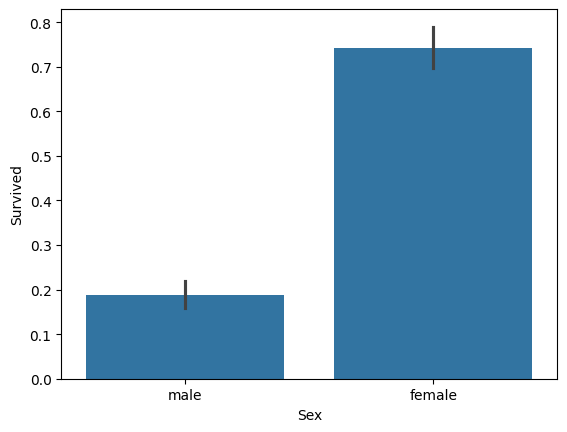

In [24]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

부자와 가난한 사람 간의 생존 확률은 어떨까? 객실 등급에 따른 생존 확률을 살펴보자.

<Axes: xlabel='Pclass', ylabel='Survived'>

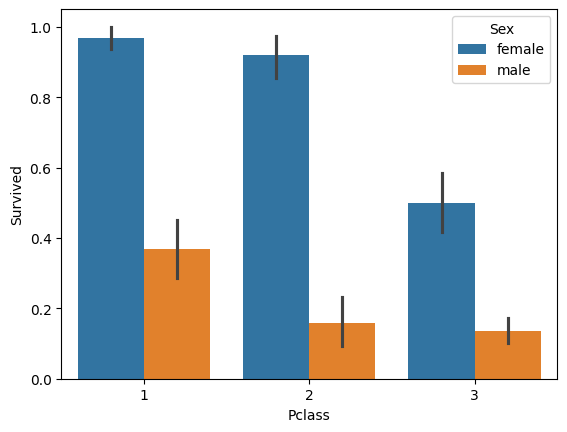

In [25]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

여성의 경우 일, 이등실에 따른 생존 확률의 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐을 알 수 있다. 남성의 경우 일등실의 생존 확률이 삼등실의 생존 확률보다 월등히 높다.

이번에는 Age에 따른 생존확률을 알아보자. Age의 경우 값 종류가 많기에 범위별로 분류해 카테고리 값을 할당해보자.

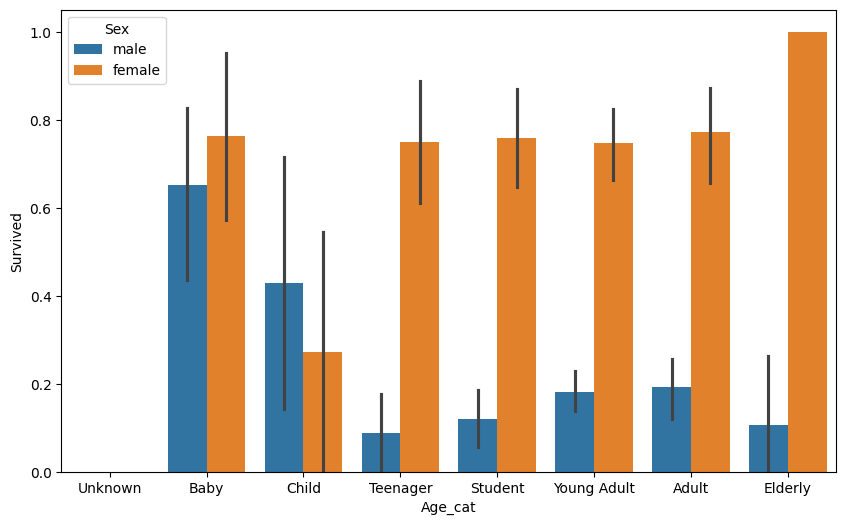

In [27]:
# 입력 age에 따라 구분 값을 반환해주는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat = ''
  if age<=-1: cat='Unknown'
  elif age<=5: cat='Baby'
  elif age<=12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60: cat='Adult'
  else: cat='Elderly'

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat을 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

여자 Baby의 경우 비교적 생존확률이 높았지만, 여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮다. 여자 Elderly의 경우 매우 생존 확률이 높았다. 이제까지 분석한 결과 Sex, Age, Pclass 등이 중요하게 생존을 좌우하는 피처임을 어느정도 확인할 수 있다.

이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환한다. 인코딩은 사이킷런의 LabelEncoder 클래스를 이용해 레이블 인코딩을 적용한다. 사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크인 fit( ), transform( )으로 데이터를 변환한다. 여러 칼럼을 encode_features( ) 함수를 새로 생성해 한 번에 변환해보자.

In [28]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


Sex, Cabin, Embarked 속성이 숫자형으로 바뀐 것을 알 수 있다.

지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 해보자. 데이터의 전처리를 전체적으로 호출하는 함수는 transform_features( )이며 Null 처리, 불필요한 피처 제거, 인코딩을 제거하는 내부 함수로 구성한다. 불필요한 피처 제거는 drop_features(df)로 수행하며 머신러닝에 불필요한 단순한 식별자 수준의 피처인 PassengerID, Name, Ticket 피처를 제거한다.

In [31]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])

  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

이 함수를 이용해 다시 원본 데이터를 가공해보자. 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만들어보자. 그리고 Survived 속성을 드롭해 피처 데이터 세트를 만든다.

In [32]:
# 원본 데이터를 재로딩 후, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

<ipython-input-31-f0537b73ab3a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-31-f0537b73ab3a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

내려받은 학습 데이터 세트를 기반으로 해서 train_test_split( ) API를 이용해 별도의 테스트 데이터 세트를 추출한다. 테스트 데이터 세트 크기는 전체의 20%로 설정한다.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측해보자. 사이킷런은 결정 트리를 위해 DecisionTreeClassifier, 랜덤 포레스트를 위해 RandomForestClassifier, 로지스틱 회귀를 위해 LogisticRegression 클래스를 제공한다.

이들 사이킷런 클래스를 이용해 분리한 학습 데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습하고(fit), 예측(predict)할 것이다. 예측 성능 평가는 정확도로 할 것이며 이를 위해 accuracy_score( ) API를 사용한다.

LogisticRegression의 생성 인자로 입력된 solver='liblinear'는 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정하는 것이다. 일반적으로 작은 데이터 세트에서 이진 분류는 liblinear가 성능이 약간 더 좋은 경향이 있다.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타내고 있다. 아직 최적화 작업을 수행하지 않았고, 데이터의 양도 충분하지 않기에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없다. 다음으로는 교차 검증으로 결정 트리 모델을 좀 더 평가해보자. 사이킷런 model_selection 패키지의 KFold 클래스, cross_val_score( ), GridSearchCV 클래스를 모두 사용한다.먼저 사이킷런의 KFold 클래스를 이용해 교차검증을 수행하며, 폴드 개수는 5개로 설정한다.

In [35]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits = folds)
  scores = []

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))
#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


평균 정확도는 약 75.23%이다. 이번에는 교차 검증을 cross_val_score( ) API를 이용해 수행한다.

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


cross_val_score( )과 KFold의 평균 정확도가 약간 다른데 이는 cross_val_score( )가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문이다.

마지막으로 GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼파라미터를 찾고 예측 성능을 측정해보자. CV는 5개 폴드 세트를 지정하고, 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하며 성능을 측정한다. 최적 하이퍼 파라미터와 그때의 예측을 출력하고 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split( )으로 분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도를 출력해보자.

In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,3,5,10],
             'min_samples_split': [2,3,5],
             'min_samples_leaf': [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


최적화된 하이퍼 파라미터로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 87.15%로 향상되었다. 하이퍼 파라미터로 변경 전보다 약 8% 이상이 증가하였는데 이는 테스트용 데이터 세트가 작기 때문에 수치 상으로 예측 성능이 많이 증가한 것으로 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵다.

사이킷런은 매우 많은 머신러닝 알고리즘을 제공할 뿐만 아니라 쉽고 직관적인 API 프레임 워크, 편리하고 다양한 모듈 지원 등으로 파이썬 계열의 대표적인 머신러닝 패키지로 자리잡았다.

머신러닝 애플리케이션은 데이터의 가공 및 변환 과정의 전처리 작업, 데이터 세트 분리 작업을 거친 후에 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습시킨다. 그리고 학습된 모델을 기반으로 테스트 데이터에 대한 예측을 수행하고, 예측된 결괏값을 실제 결괏값과 비교해 머신러닝 모델에 대한 평가를 수행하는 방식으로 구성된다.

데이터의 전처리 작업은 오류 데이터의 보정이나 Null 값 처리 등의 데이터 클렌징 작업, 레이블 인코딩이나 원-핫 인코딩과 같은 인코딩 작업, 그리고 데이터의 스케일링/정규화 작업 등으로 머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터를 사전 처리하는 것이다.

머신러닝 모델은 학습 데이터 세트로 학습된 뒤 반드시 별도의 데이터 세트로 평가 되어야 한다. 또한, 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들지 않기 위해서는 KFold, StratifiedKFold, cross_val_score( ) 교차 검증을 수행할 수도 있다. 또한, 머신러닝 모델의 최적의 하이퍼파라미터를 교차 검증을 통해 추출하기 위해 GridSearchCV를 제공한다.

사이킷런은 다양한 개발 환경에서 오랜 기간 동안 라이브러리의 안정성과 유용성이 검증된 패키지이며, 파이썬 기반에서 머신러닝을 배우기 원한다면 반드시 경험해야 할 패키지이다.